In [216]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm


%matplotlib inline

In [217]:
ds_pred = xr.open_dataset('../../../data/rws/matroos/hoekvanholland-2017-2022-pred.nc')
ds_obs = xr.open_dataset('../../../data/rws/matroos/hoekvanholland-2017-2022.nc')

In [218]:
t_pred = ds_pred.time
surge_pred = ds_pred.waterlevel_surge
t_obs = ds_obs.time
surge_obs = ds_obs.waterlevel_surge

In [219]:
df_pred = pd.DataFrame(dict(t=t_pred, surge=surge_pred[:, 0]))
df_obs = pd.DataFrame(dict(t=t_obs, surge=surge_obs[:, 0]))

In [220]:
df_pred['year'] = df_pred['t'].apply(lambda x:x.year)
df_obs['year'] = df_obs['t'].apply(lambda x:x.year)

In [221]:
df = pd.merge(
    # Resample to 10min and  merge
    df_pred.set_index('t').resample('10min')['surge'].mean(), 
    df_obs.set_index('t').resample('10min')['surge'].mean(), 
    suffixes=['_pred', '_obs'], 
    left_index=True, 
    right_index=True
)


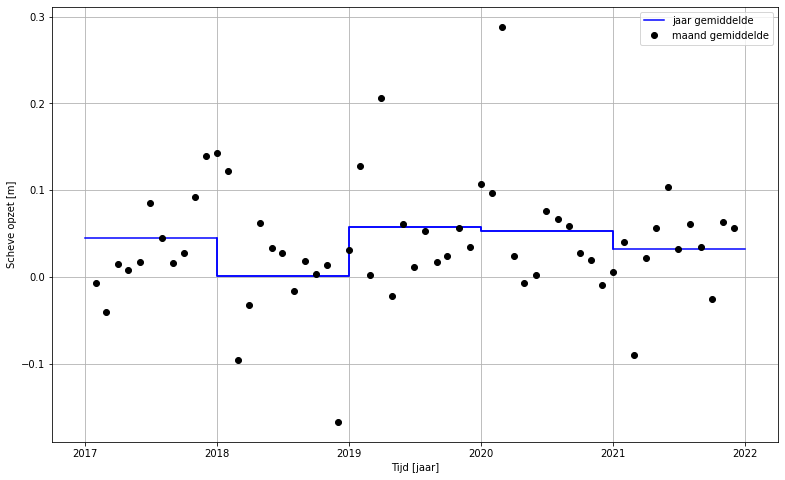

In [222]:
# ax = df.resample('MS').mean().plot(drawstyle="steps")

# ax = df.resample('A').mean().plot(drawstyle="steps")
# ax.set_ylabel('Scheve opzet in Hoek van Holland [m]')
# ax.set_xlabel('Tijd [jaar]')
fig, ax = plt.subplots(figsize=(13, 8))
annual_df = df.resample('AS').mean().reset_index()
ax.step(annual_df['t'],  annual_df['surge_pred'], where='post', color='blue')
annual_df = df.resample('A').mean().reset_index()
ax.step(annual_df['t'],  annual_df['surge_pred'], where='pre', label='jaar gemiddelde', color='blue')
monthly_df = df.resample('M').mean().reset_index()
ax.plot(monthly_df['t'],  monthly_df['surge_pred'], 'ko', label='maand gemiddelde')
ax.set_ylabel('Scheve opzet [m]')
ax.set_xlabel('Tijd [jaar]')
ax.grid(True)
ax.legend()

In [105]:
df.resample('MS').mean().sort_values('surge_obs', ascending=False).head()

,surge_pred,surge_obs
t,,
2020-02-01,0.288513,0.282975
2019-03-01,0.205768,0.189996
2017-11-01,0.139680,0.127581
2017-12-01,0.142464,0.123686
2018-01-01,0.121646,0.110285


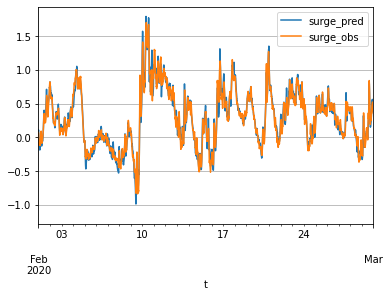

In [90]:
ax = df.plot()
ax.set_xlim('2020-02-01', '2020-03-01')
ax.grid(True)

In [104]:
df.resample('AS').mean()

,surge_pred,surge_obs
t,,
2017-01-01,0.045441,0.044609
2018-01-01,0.001048,-0.015204
2019-01-01,0.057538,0.046228
2020-01-01,0.053206,0.046674
2021-01-01,0.032682,0.038375


In [110]:
df.resample('A').mean()

,surge_pred,surge_obs
t,,
2017-12-31,0.045441,0.044609
2018-12-31,0.001048,-0.015204
2019-12-31,0.057538,0.046228
2020-12-31,0.053206,0.046674
2021-12-31,0.032682,0.038375


<AxesSubplot:xlabel='t'>

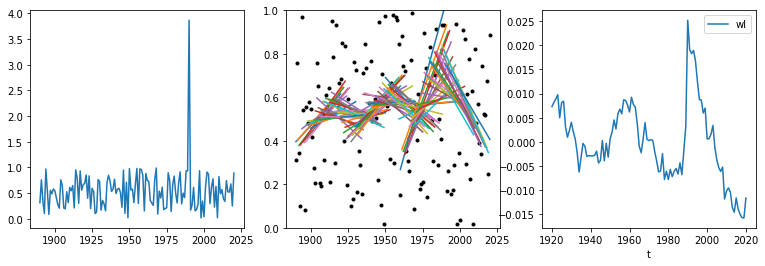

In [214]:
import numpy as np
years = np.arange(1890, 2021)
wl = np.random.random(years.shape)
wl[100] -= -3
df = pd.DataFrame(dict(t=years, wl=wl))

fig, axes  = plt.subplots(ncols=3, figsize=(13, 4))
axes[0].plot(years,  wl)
axes[1].plot(years,  wl, 'k.')
axes[1].set_ylim(0, 1)


def trend(df_i):
    fit  = sm.OLS( df_i.values, sm.add_constant(df_i.index.values)).fit()
    predicted = fit.predict()
    axes[1].plot(df_i.index, predicted)
    return fit.params[1]

df.set_index('t').rolling(window=31).apply(trend).plot(ax=axes[2])